<a href="https://colab.research.google.com/github/seoyeon7/ML/blob/main/Linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import math
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [55]:
data = pd.read_csv('/content/iris.data',header=None, names=['sepal_len','sepal_width','petal_len','petal_width','class'])

In [56]:
index=data[['sepal_len','sepal_width','petal_len','petal_width']]
target = data['class']

In [57]:
data = data.sample(frac=1).reset_index(drop=True)

In [58]:
def split(dataset):
    train_size = int(data.shape[0]*0.80)
    test_size = int(data.shape[0]*0.20)
    
    traindata = dataset.iloc[test_size:].reset_index(drop=True)
    testdata = dataset.iloc[:test_size].reset_index(drop=True)
    return traindata,testdata

train = split(data)[0]
test = split(data)[1]

In [59]:
train.head

<bound method NDFrame.head of      sepal_len  sepal_width  petal_len  petal_width            class
0          5.8          2.7        5.1          1.9   Iris-virginica
1          5.0          3.3        1.4          0.2      Iris-setosa
2          5.7          2.6        3.5          1.0  Iris-versicolor
3          7.2          3.6        6.1          2.5   Iris-virginica
4          6.9          3.1        5.1          2.3   Iris-virginica
..         ...          ...        ...          ...              ...
115        6.3          3.3        4.7          1.6  Iris-versicolor
116        6.3          2.5        5.0          1.9   Iris-virginica
117        6.5          3.0        5.8          2.2   Iris-virginica
118        5.2          4.1        1.5          0.1      Iris-setosa
119        5.5          4.2        1.4          0.2      Iris-setosa

[120 rows x 5 columns]>

<function matplotlib.pyplot.show>

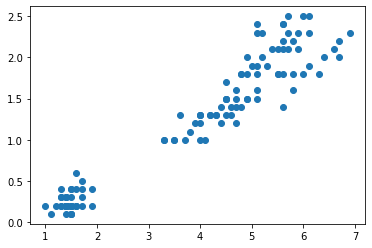

In [60]:
#4개의 feature 중 petal_len, petal_width 사용

p_len=np.array(train['petal_len'])
p_width=np.array(train['petal_width'])
plt.scatter(p_len,p_width)
plt.show

In [61]:
#경사하강법 -> a, b는 가설을 구성하는 파라미터 값
def Grad1(x,y,a,b):
    return sum((a*x+b-y)*x)/len(y)

def Grad2(x,y,a,b):
    return sum(a*x+b)/len(y)

In [62]:
def Train(len,width,n,LearningRate):
    a,b=0,0
    for _ in range(n):
        grad_a=Grad1(len,width,a,b)
        grad_b=Grad2(len,width,a,b)
        a-=LearningRate*grad_a
        b-=LearningRate*grad_b
    return [a,b]

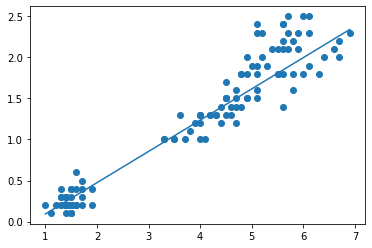

In [63]:
a,b=Train(p_len,p_width,1000,0.0003)

plt.scatter(p_len,p_width)
plt.plot([min(p_len),max(p_len)],np.array([min(p_len),max(p_len)])*a+b)
plt.show()